## Variável preditora continua usa a função de densidade probabilidade para calculo do algoritimo

# Objetivo , tentar reproduzir as probabilidades do algoritimo GaussianNB() da linha 146 do dataset 

In [258]:
import numpy as np
import pandas as pd
import sklearn.datasets  as dataset

In [259]:
#Dataset Iris
ds = dataset.load_iris()
x = pd.DataFrame(ds.data,columns=ds.feature_names)

y = pd.DataFrame(ds.target,columns=['Target'])
dados =x.join(y)

In [327]:
x = x.iloc[:,0:2]


In [261]:
# Selecionando apenas 2 variaveis X para facilitar no calculo
dados = dados[['sepal length (cm)','sepal width (cm)','Target']]


# Modelo GaussianNB

In [262]:
from sklearn.naive_bayes import GaussianNB
mod1 = GaussianNB()
mod1.fit(x,y)

mm = pd.DataFrame(mod1.predict_proba(x));mm

mm['y_chapeu']=np.argmax(mm.to_numpy(),axis=1)
mm['Target'] = dados.iloc[:,2];mm


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,0,1,2,y_chapeu,Target
0,0.975339,0.014091,0.010570,0,0
1,0.835457,0.134652,0.029890,0,0
2,0.961570,0.028838,0.009592,0,0
3,0.946785,0.041982,0.011233,0,0
4,0.990867,0.004779,0.004354,0,0
...,...,...,...,...,...
145,0.000005,0.242911,0.757085,2,2
146,0.000077,0.692334,0.307589,1,2
147,0.000055,0.346533,0.653412,2,2
148,0.009039,0.291799,0.699162,2,2


In [392]:
#Probabilidades de ocorrencia do evento com o algoritimo GaussianNB()
prob = pd.DataFrame(mm.iloc[146,0:3]);prob.T

,0,1,2
146,0.000077,0.692334,0.307589


In [393]:
#Variancia (Raiz do desvio padrao)de cada coluna da variavel X para cada classe da variável target
mod1.sigma_

array([[0.121764, 0.140816],
       [0.261104, 0.0965  ],
       [0.396256, 0.101924]])

In [394]:
#Media de cada coluna da variavel X para cada classe da variável target
mod1.theta_

array([[5.006, 3.428],
       [5.936, 2.77 ],
       [6.588, 2.974]])

In [397]:
#Dividir o dataset pelas classes
class0 =dados.iloc[0:50,:]
class1 =dados.iloc[50:100,:]
class2 =dados.iloc[100:,:]

# FUNÇAO DENSIDADE PROBABILIDADE(PROBABILIDADE CONDICIONAL)

# Linha 146 (1° Formula)

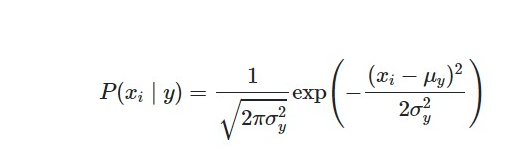

In [398]:
from IPython.display import Image
Image(filename="imagem/Form_den1.png")

In [399]:
#sepal length = 6.3 
#sepal width = 2.5

In [400]:
#classe0

# media 5.006, 3.428
# Variancia :0.121764, 0.140816


#Probabilidade condicional sepal length  
sepal_length = 6.3
sepallength_media = 5.006
pi = 3.14
variancia = 0.121764
rl0 = 1/(np.sqrt(2*pi)*variancia)*(np.exp(-1*(((sepal_length-sepallength_media)/variancia)**2)))

#Probabilidade condicional sepal width 
sepal_width = 2.5
sepal_width_media = 3.428
pi = 3.14
variancia = 0.140816
rw0 = 1/((np.sqrt(2*pi)*variancia)**2)*(np.exp(-1*((((sepal_width-sepal_width_media)**2)/((2*variancia))**2))))

In [401]:
#classe1

# media 5.936, 2.77
# Variancia :0.261104, 0.0965


#Probabilidade condicional sepal length  
sepal_length = 6.3
sepallength_media = 5.936
pi = 3.14
variancia = 0.261104
rl1 = 1/(np.sqrt(2*pi)*variancia)*(np.exp(-1*(((sepal_length-sepallength_media)/variancia)**2)))

#Probabilidade condicional sepal width 
sepal_width = 2.5
sepal_width_media = 2.77
pi = 3.14
variancia = 0.0965
rw1 = 1/((np.sqrt(2*pi)*variancia)**2)*(np.exp(-1*((((sepal_width-sepal_width_media)**2)/((2*variancia))**2))))

In [402]:
#classe2

# media 6.588, 2.974
# Variancia :0.396256, 0.101924


#Probabilidade condicional sepal length  
sepal_length = 6.3
sepallength_media = 6.588
pi = 3.14
variancia = 0.396256
rl2 = 1/(np.sqrt(2*pi)*variancia)*(np.exp(-1*(((sepal_length-sepallength_media)/variancia)**2)))

#Probabilidade condicional sepal width 
sepal_width = 2.5
sepal_width_media = 2.974
pi = 3.14
variancia = 0.101924
rw2 = 1/((np.sqrt(2*pi)*variancia)**2)*(np.exp(-1*((((sepal_width-sepal_width_media)**2)/((2*variancia))**2))))

In [403]:
res0=rl0 *rw0 
res1=rl1 *rw1
res2=rl2 *rw2 

In [404]:
reclass0=(res0*0.33)/((res0*0.33)+(res1*0.33)+(res2*0.33))
print(f'Classe 0 = {reclass0}')

Classe 0 = 7.981075154260131e-53


In [405]:
reclass1=(res1*0.33)/((res0*0.33)+(res1*0.33)+(res2*0.33))
print(f'Classe 1 = {reclass1}')

Classe 1 = 0.9283114411746722


In [406]:
reclass2=(res2*0.33)/((res0*0.33)+(res1*0.33)+(res2*0.33))
print(f'Classe 2 = {reclass2}')

Classe 2 = 0.07168855882532782


In [442]:
#Comparaçao 
df0 = pd.DataFrame({ 'mine': [7.981075154260131e-53, 0.9283114411746722, 0.07168855882532782]});df.T
prob.join(df0).T


,0,1,2
146,7.656584e-05,0.692334,0.307589
mine,7.981075e-53,0.928311,0.071689


In [441]:
sum(df0.values)


array([1.])

# Linha 146 (2° Formula)

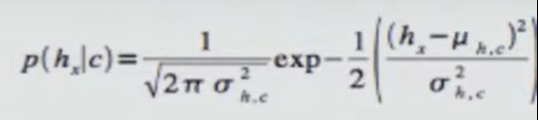

In [408]:
from IPython.display import Image
Image(filename="imagem/Form_den2.png")


In [409]:
#classe0

# media 5.006, 3.428
# Variancia :0.121764, 0.140816


#Probabilidade condicional sepal length  
sepal_length = 6.3
sepallength_media = 5.006
pi = 3.14
variancia = 0.121764
rl0 = 1/(np.sqrt(2*pi)*variancia)*(np.exp(-0.5*(((sepal_length-sepallength_media)/variancia)**2)))

#Probabilidade condicional sepal width 
sepal_width = 2.5
sepal_width_media = 3.428
pi = 3.14
variancia = 0.140816
rw0 = 1/((np.sqrt(2*pi)*variancia)**2)*(np.exp(-0.5*((((sepal_width-sepal_width_media)**2)/((variancia))**2))))

In [410]:
#classe1

# media 5.936, 2.77
# Variancia :0.261104, 0.0965


#Probabilidade condicional sepal length  
sepal_length = 6.3
sepallength_media = 5.936
pi = 3.14
variancia = 0.261104
rl1 = 1/(np.sqrt(2*pi)*variancia)*(np.exp(-0.5*(((sepal_length-sepallength_media)/variancia)**2)))

#Probabilidade condicional sepal width 
sepal_width = 2.5
sepal_width_media = 2.77
pi = 3.14
variancia = 0.0965
rw1 = 1/((np.sqrt(2*pi)*variancia)**2)*(np.exp(-0.5*((((sepal_width-sepal_width_media)**2)/((variancia))**2))))

In [411]:
#classe2

# media 6.588, 2.974
# Variancia :0.396256, 0.101924


#Probabilidade condicional sepal length  
sepal_length = 6.3
sepallength_media = 6.588
pi = 3.14
variancia = 0.396256
rl2 = 1/(np.sqrt(2*pi)*variancia)*(np.exp(-0.5*(((sepal_length-sepallength_media)/variancia)**2)))

#Probabilidade condicional sepal width 
sepal_width = 2.5
sepal_width_media = 2.974
pi = 3.14
variancia = 0.101924
rw2 = 1/((np.sqrt(2*pi)*variancia)**2)*(np.exp(-0.5*((((sepal_width-sepal_width_media)**2)/((variancia))**2))))


In [412]:
res0=rl0 *rw0 
res1=rl1 *rw1
res2=rl2 *rw2 

In [413]:
reclass0=(res0*0.33)/((res0*0.33)+(res1*0.33)+(res2*0.33))
print(f'Classe 0 = {reclass0}')

Classe 0 = 1.479296621559414e-32


In [414]:
reclass1=(res1*0.33)/((res0*0.33)+(res1*0.33)+(res2*0.33))
print(f'Classe 1 = {reclass1}')

Classe 1 = 0.9987929749357127


In [415]:
reclass2=(res2*0.33)/((res0*0.33)+(res1*0.33)+(res2*0.33))
print(f'Classe 2 = {reclass2}')

Classe 2 = 0.0012070250642872028


In [416]:
#Comparaçao 
df1 = pd.DataFrame({ 'mine': [1.479296621559414e-32, 0.9987929749357127,0.0012070250642872028]});df.T
prob.join(df1).T

,0,1,2
146,7.656584e-05,0.692334,0.307589
mine,1.479297e-32,0.998793,0.001207


# Linha 146 (3° Formula)

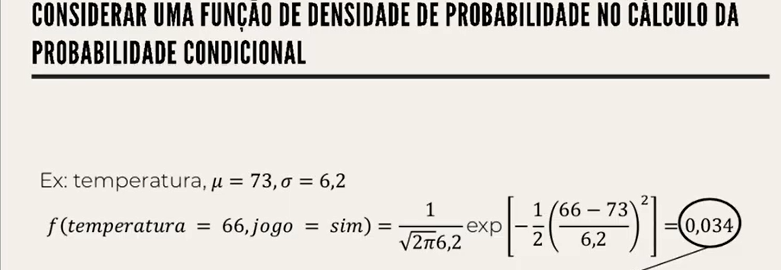

In [417]:
from IPython.display import Image
Image(filename="imagem/Form_den.png")


In [418]:
#classe0
# media 5.006, 3.428
# Variancia :0.121764, 0.140816
#Probabilidade condicional sepal length  
sepal_length = 6.3
sepallength_media = 5.006
pi = 3.14
variancia = 0.121764
rl0 = 1/(np.sqrt(2*pi)*variancia)*(np.exp(-0.5*(((sepal_length-sepallength_media)/variancia)**2)))

#Probabilidade condicional sepal width 
sepal_width = 2.5
sepal_width_media = 3.428
pi = 3.14
variancia = 0.140816
rw0 = 1/(np.sqrt(2*pi)*variancia)*(np.exp(-0.5*(((sepal_width-sepal_width_media)/variancia)**2)))

In [419]:
#classe1
# media 5.936, 2.77
# Variancia :0.261104, 0.0965
#Probabilidade condicional sepal length  
sepal_length = 6.3
sepallength_media = 5.936
pi = 3.14
variancia = 0.261104
rl1 = 1/(np.sqrt(2*pi)*variancia)*(np.exp(-0.5*(((sepal_length-sepallength_media)/variancia)**2)))

#Probabilidade condicional sepal width 
sepal_width = 2.5
sepal_width_media = 2.77
pi = 3.14
variancia = 0.0965
rw1 = 1/(np.sqrt(2*pi)*variancia)*(np.exp(-0.5*(((sepal_width-sepal_width_media)/variancia)**2)))

In [420]:
#classe2
# media 6.588, 2.974
# Variancia :0.396256, 0.101924
#Probabilidade condicional sepal length  
sepal_length = 6.3
sepallength_media = 6.588
pi = 3.14
variancia = 0.396256
rl2 = 1/(np.sqrt(2*pi)*variancia)*(np.exp(-0.5*(((sepal_length-sepallength_media)/variancia)**2)))

#Probabilidade condicional sepal width 
sepal_width = 2.5
sepal_width_media = 2.974
pi = 3.14
variancia = 0.101924
rw2 = 1/(np.sqrt(2*pi)*variancia)*(np.exp(-0.5*(((sepal_width-sepal_width_media)/variancia)**2)))

In [421]:
res0=rl0 *rw0 
res1=rl1 *rw1
res2=rl2 *rw2 

In [422]:
reclass0=(res0*0.33)/((res0*0.33)+(res1*0.33)+(res2*0.33))
print(f'Classe 0 = {reclass0}')

Classe 0 = 2.158492244767979e-32


In [423]:
reclass1=(res1*0.33)/((res0*0.33)+(res1*0.33)+(res2*0.33))
print(f'Classe 1 = {reclass1}')

Classe 1 = 0.9987252178572418


In [424]:
reclass2=(res2*0.33)/((res0*0.33)+(res1*0.33)+(res2*0.33))
print(f'Classe 2 = {reclass2}')

Classe 2 = 0.001274782142758184


In [433]:
df2 = pd.DataFrame({ 'mine': [2.158492244767979e-32, 0.9987252178572418,0.001274782142758184]});df.T
prob.join(df2).T

,0,1,2
146,7.656584e-05,0.692334,0.307589
mine,2.158492e-32,0.998725,0.001275
